Mixed methods from [link](http://alexanderdemos.org/MixedOverview.html)

In [19]:

library(tidyr)
library(dplyr)

TrustWide=read.csv("dataFolder/TrustWideData.csv")

TrustLong=TrustWide %>% gather(Condition, TrustFeeling,NoSee_0:See_4)

TrustLong.Final=TrustLong %>% separate(Condition,c("Vision","Time"),sep="_", convert = TRUE)


TrustWide.Again=
  TrustLong.Final %>% 
  unite(Condition,c("Vision","Time"),sep="_") %>% 
  spread(Condition, TrustFeeling)


Installing package into ‘/home/julian/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


In [25]:
Means<-TrustLong.Final %>%
  group_by(Vision,Time) %>%
  summarise(MeanTrust=mean(TrustFeeling),
            SDTrust=sd(TrustFeeling))

In [27]:
library(broom)
CorrResult<-TrustLong.Final %>%
  group_by(Vision,Subject) %>%
  do(tidy(cor.test(.$Time, .$TrustFeeling)))

In [31]:
RegresResult<-TrustLong.Final %>%
  group_by(Vision,Subject) %>%
  do(tidy(lm(TrustFeeling ~ Time, data=.)))


In [33]:
RegresResult <-
  RegresResult %>%
  mutate(Sig = if_else(p.value < .05,1,0))

In [35]:
RSum<-RegresResult  %>%
  group_by(Vision,Sig) %>%
  dplyr::filter(term=="Time") %>%
  summarise(N=length(Sig),
            MeanSlope=mean(estimate))

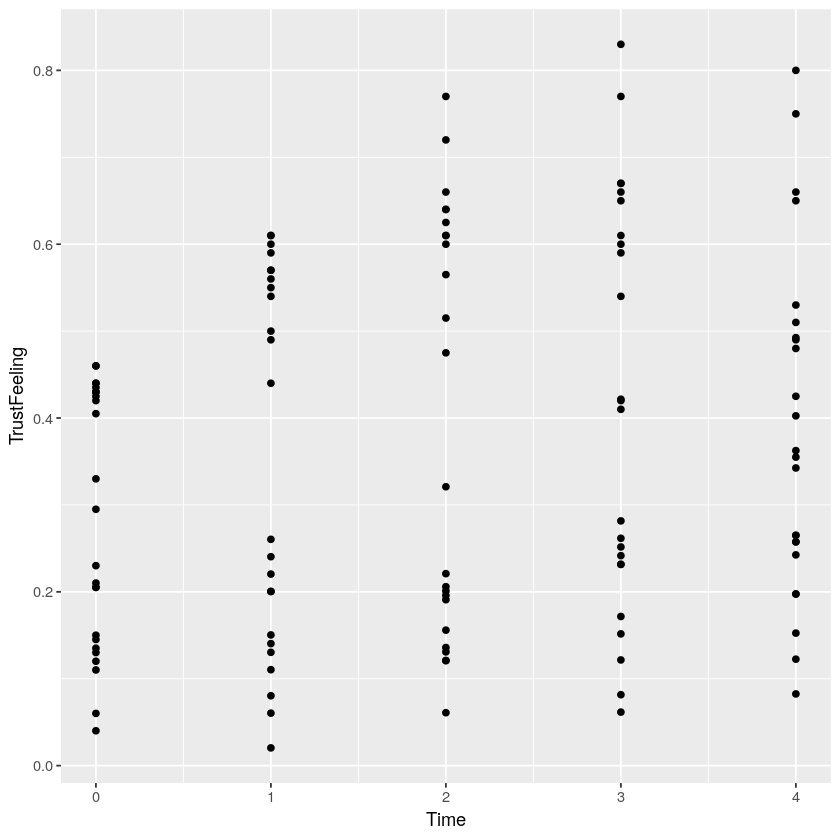

In [43]:
library(ggplot2)
G1<-ggplot(data = TrustLong.Final, aes(x = Time , y = TrustFeeling))
G2<-G1+geom_point()
G2

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


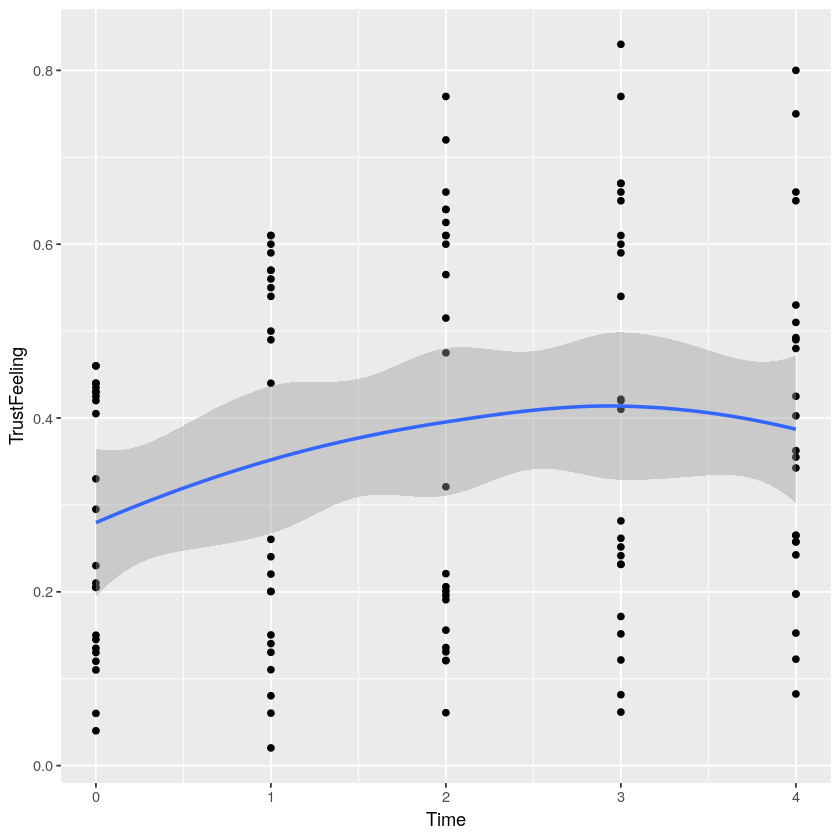

In [44]:
G3<-G2+geom_smooth()
G3

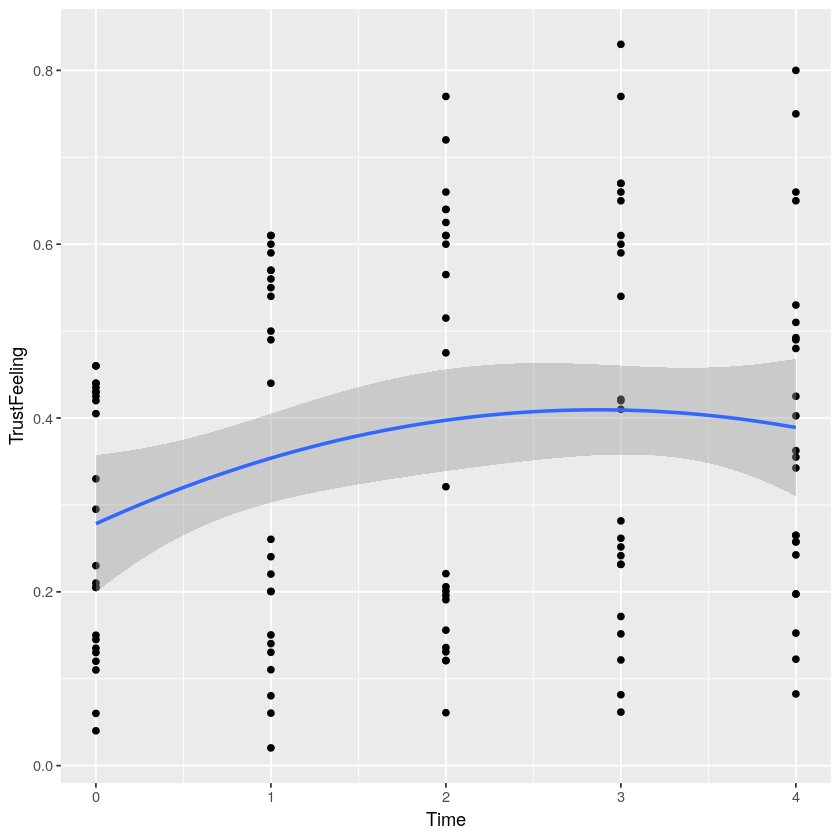

In [48]:
G3a<-G2+geom_smooth(method='lm', formula = y ~ stats::poly(x,2))
G3a

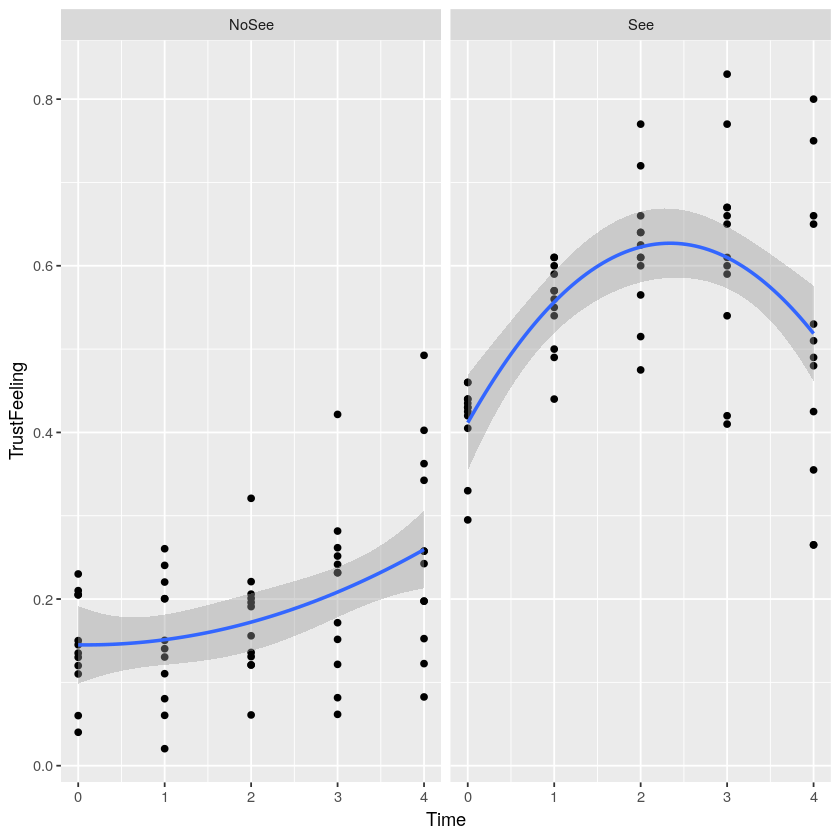

In [49]:
G4a<-G3a+facet_grid(~Vision)
G4a

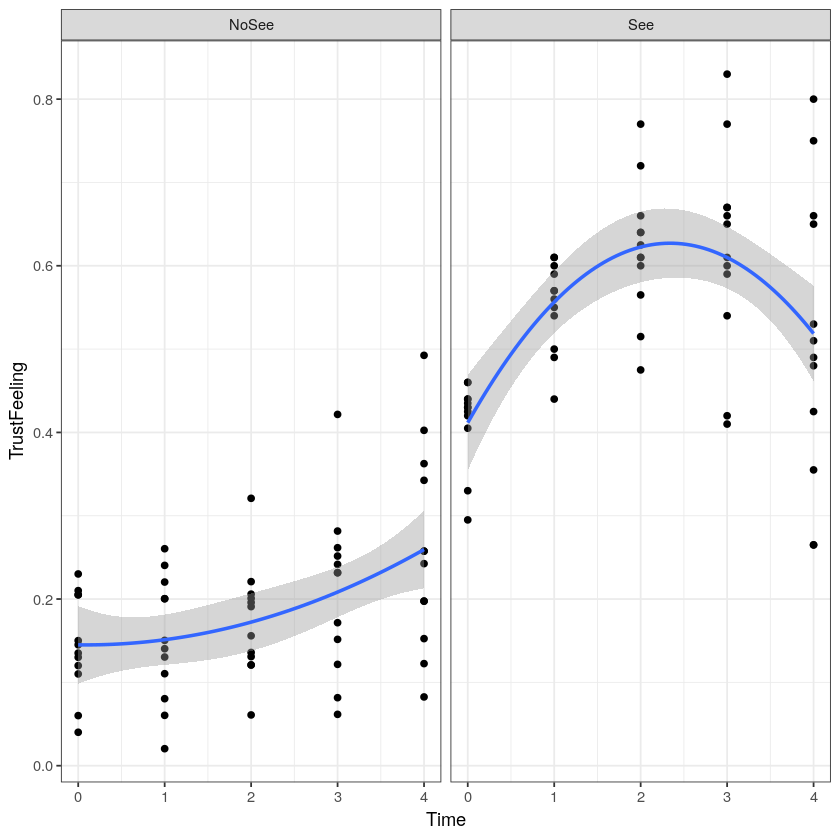

In [50]:
G4b<-G4a+theme_bw()
G4b

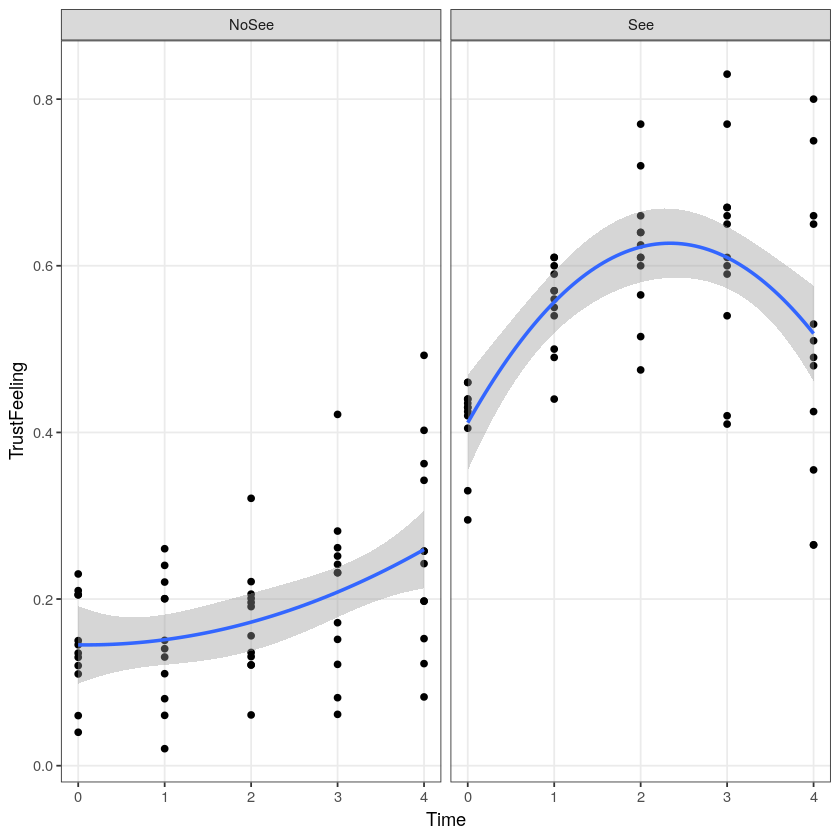

In [51]:
G4c<-G4b+theme(panel.grid.minor = element_blank())
G4c

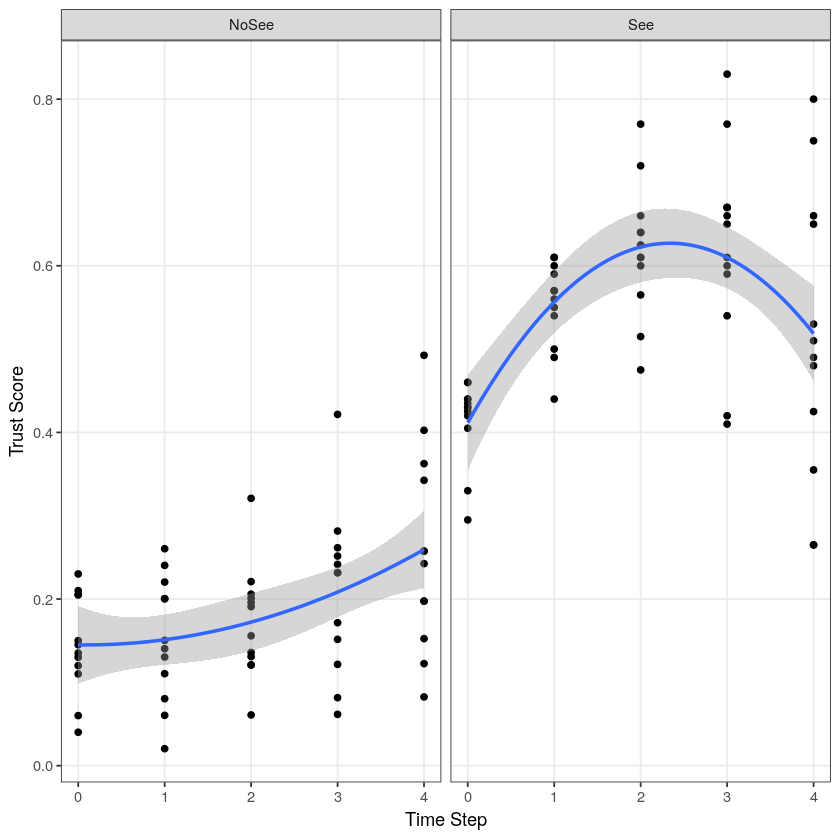

In [52]:
G4d<-G4c+xlab("Time Step")+ylab("Trust Score")
G4d

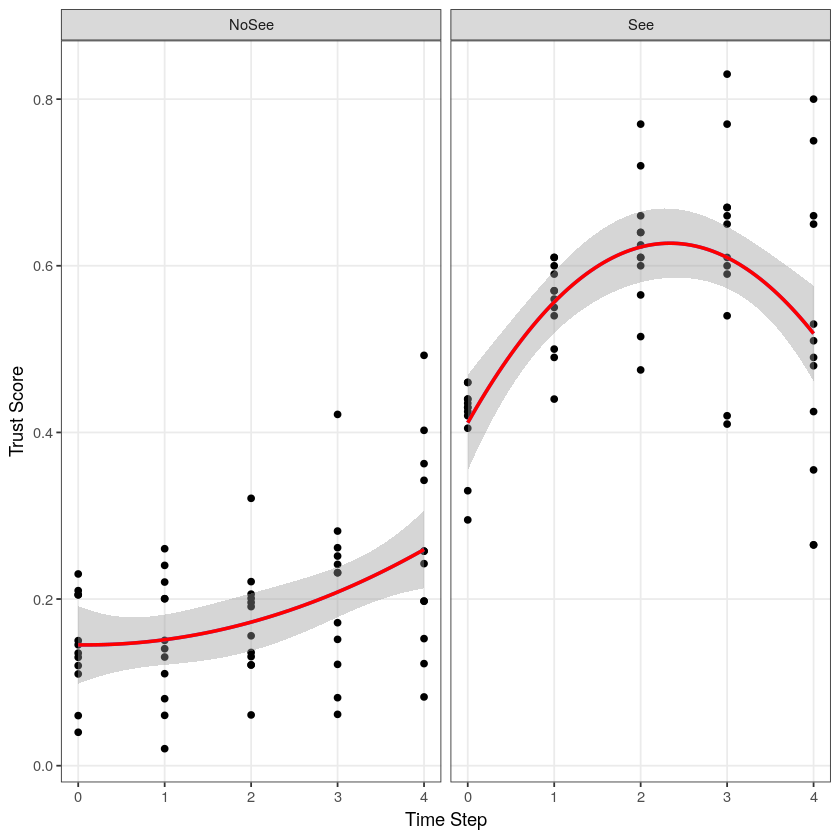

In [53]:
G4e<-G4d+geom_smooth(method='lm', se=FALSE, formula = y ~ stats::poly(x,2), color='red')
G4e

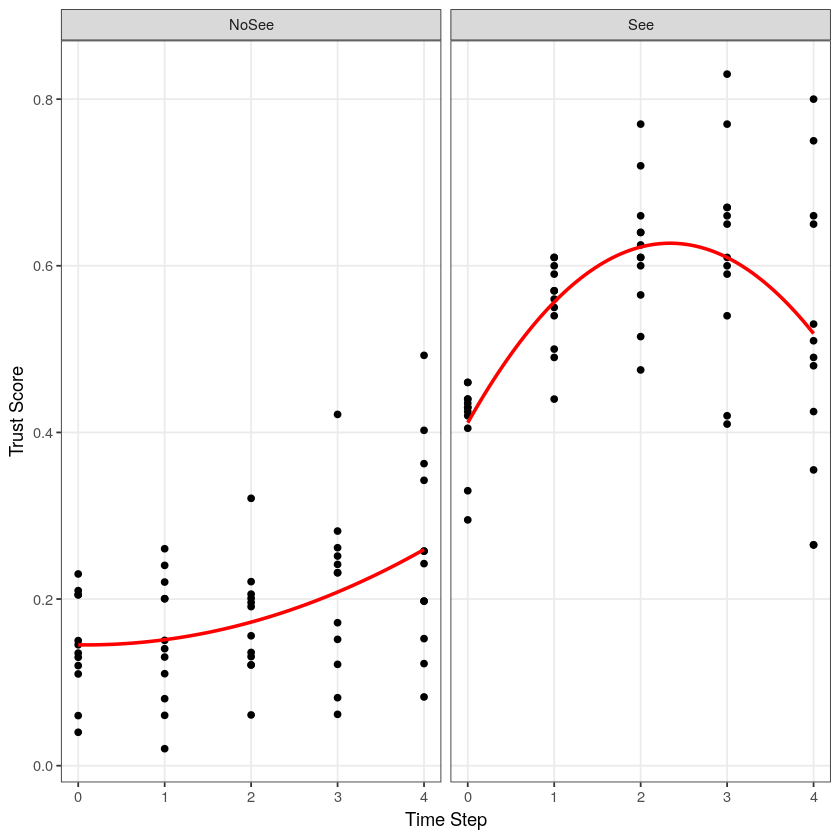

In [58]:
Poly.Plot<-ggplot(data = TrustLong.Final, aes(x = Time , y = TrustFeeling))+
  facet_grid(~Vision)+
  geom_point()+
  geom_smooth(method='lm', se=FALSE, formula = y ~ stats::poly(x,2), color='red')+
  xlab("Time Step")+ylab("Trust Score")+
  theme_bw()+
  theme(panel.grid.minor = element_blank())
Poly.Plot

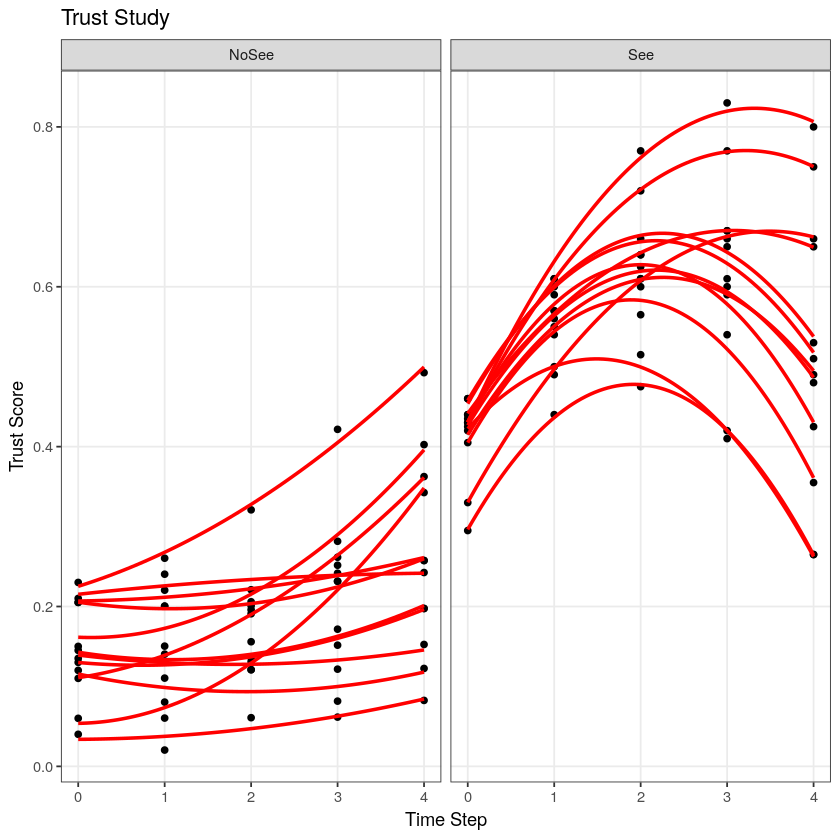

In [59]:
Speg.Plot<-ggplot(data = TrustLong.Final, aes(x = Time , y = TrustFeeling))+
  facet_grid(~Vision)+
  geom_point()+
  geom_smooth(aes(group=Subject),method='lm', se=FALSE, formula = y ~ stats::poly(x,2), color='red')+
  xlab("Time Step")+ylab("Trust Score")+
  theme_bw()+
  theme(panel.grid.minor = element_blank())+
  ggtitle("Trust Study")
Speg.Plot

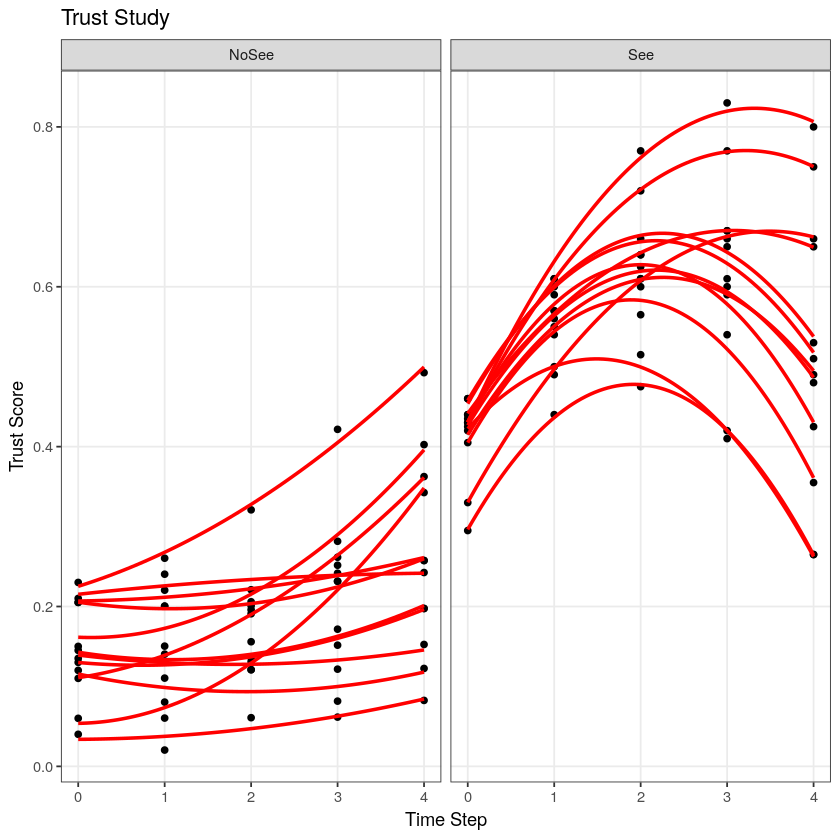

In [60]:
Speg.Plot.2<-ggplot(data = TrustLong.Final, 
                    aes(x = Time , y = TrustFeeling,group=Subject))+
  facet_grid(~Vision)+
  geom_point()+
  geom_smooth(method='lm', se=FALSE, formula = y ~ stats::poly(x,2), color='red')+
  xlab("Time Step")+ylab("Trust Score")+
  theme_bw()+
  theme(panel.grid.minor = element_blank())+
  ggtitle("Trust Study")
Speg.Plot.2

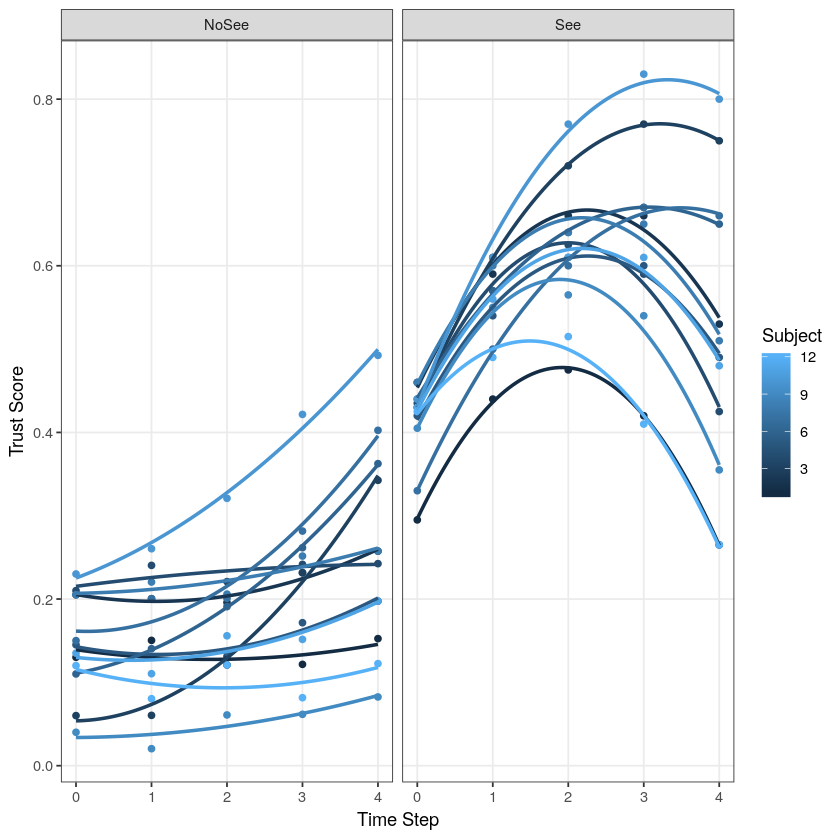

In [62]:


Speg.Plot.3<-ggplot(data = TrustLong.Final, 
                    aes(x = Time, y = TrustFeeling, group=Subject, color=Subject))+
  facet_grid(~Vision)+
  geom_point()+
  geom_smooth(method='lm', se=FALSE, formula = y ~ stats::poly(x,2))+
  xlab("Time Step")+ylab("Trust Score")+
  theme_bw()+
  theme(panel.grid.minor = element_blank())
Speg.Plot.3

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 12. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 60 rows containing missing values (geom_point).”

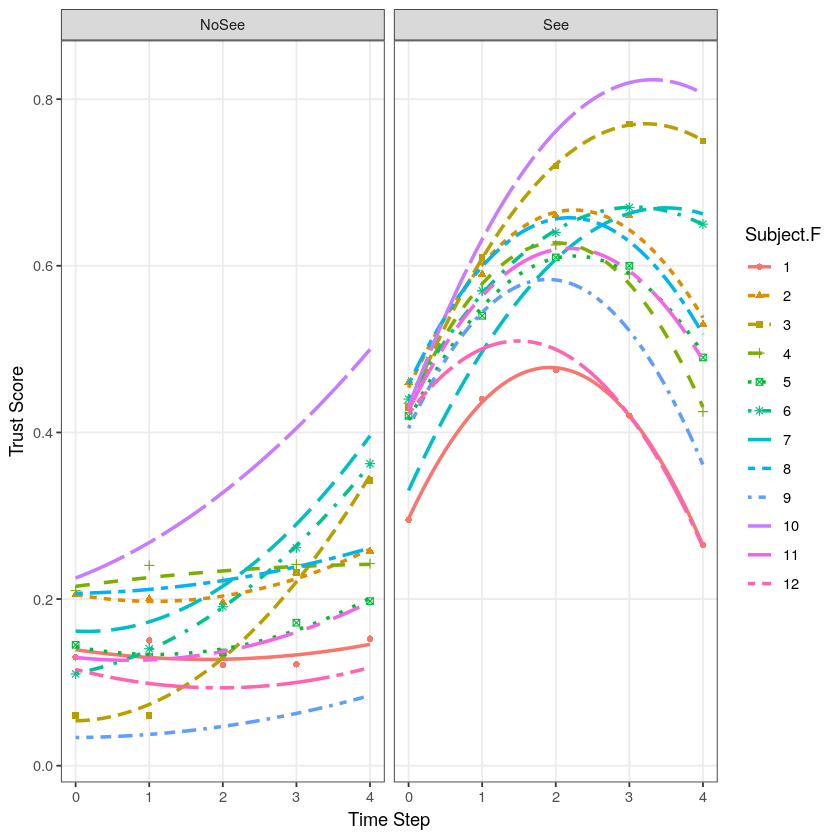

In [63]:
TrustLong.Final$Subject.F<-as.factor(TrustLong.Final$Subject)
Speg.Plot.4<-ggplot(data = TrustLong.Final, 
                    aes(x = Time, y = TrustFeeling, group=Subject.F, color=Subject.F,shape=Subject.F,linetype=Subject.F))+
  facet_grid(~Vision)+
  geom_point()+
  geom_smooth(method='lm', se=FALSE, formula = y ~ stats::poly(x,2))+
  xlab("Time Step")+ylab("Trust Score")+
  theme_bw()+
  theme(panel.grid.minor = element_blank())
Speg.Plot.4

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 12. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 60 rows containing missing values (geom_point).”

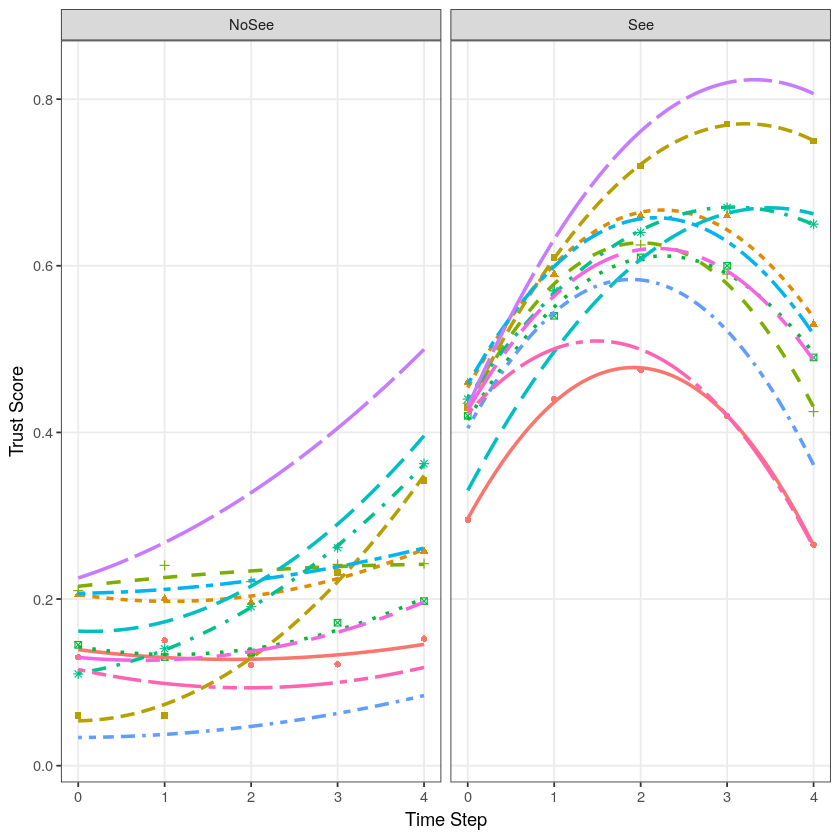

In [64]:
Speg.Plot.4a<-Speg.Plot.4+theme(legend.position = "none")
Speg.Plot.4a

In [66]:
TrustLong.Final$Subject.F<-as.factor(TrustLong.Final$Subject)
PolyRegress<-TrustLong.Final %>%
  group_by(Vision, Subject.F) %>%
  do(glance(lm(TrustFeeling ~ stats::poly(Time,2), data=.)))  %>%
  select(Vision,r.squared)

Adding missing grouping variables: `Subject.F`


In [69]:
PersonalityScore<-TrustLong.Final %>% 
  dplyr::filter(Time==0) %>% 
  select(Subject.F,Personality, Vision)

MergedData<-left_join(PolyRegress,PersonalityScore)

Joining, by = c("Subject.F", "Vision")


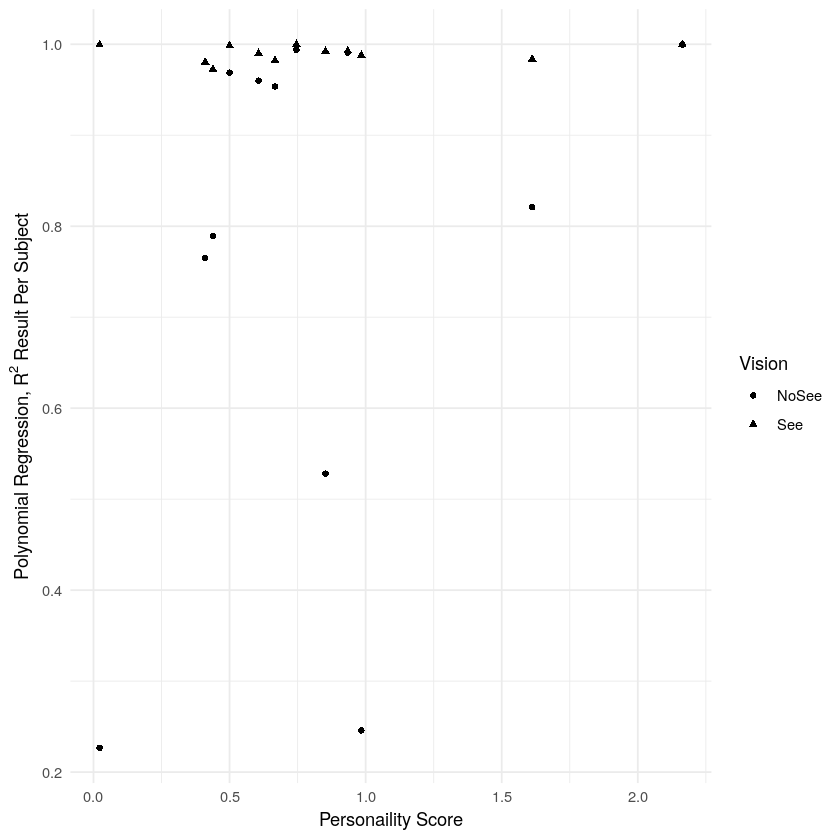

In [71]:
Scatter.plot<-ggplot(data = MergedData, aes(Personality,r.squared))+
  geom_point(aes(shape=Vision))+
  xlab("Personaility Score")+
  ylab(expression(paste("Polynomial Regression, ", R^{2},' Result Per Subject')))+
  theme_minimal()
Scatter.plot

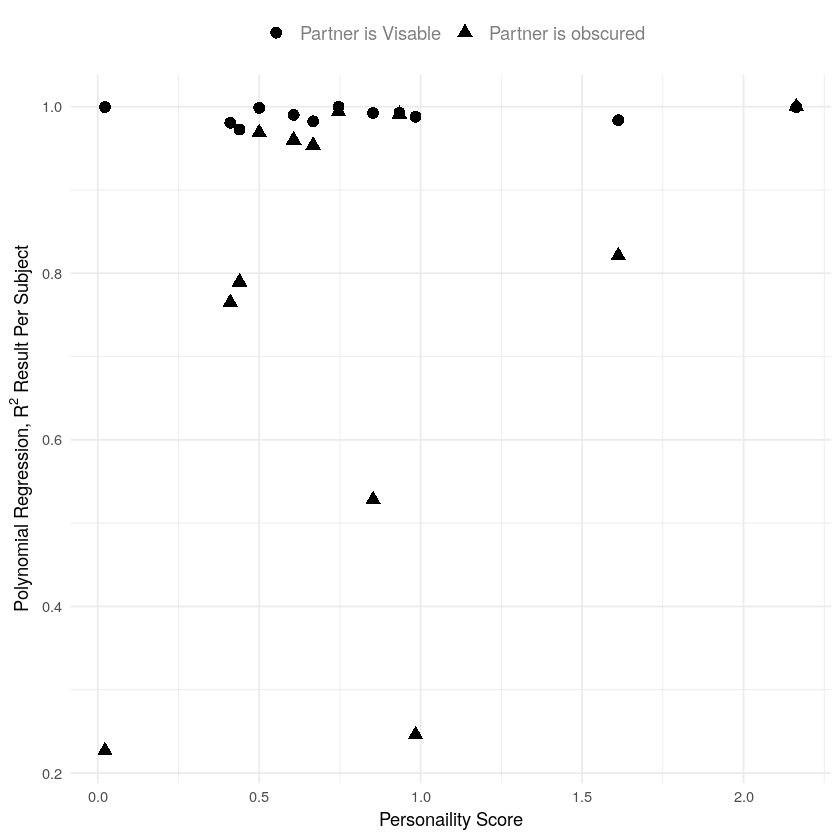

In [73]:
MergedData$Vision.O <- factor(MergedData$Vision,
                     levels = c("See","NoSee"),
                     labels = c("Partner is Visable","Partner is obscured"))
Scatter.plot2<-ggplot(data = MergedData, aes(Personality,r.squared))+
  geom_point(aes(shape=Vision.O),size = 2.5, stroke = 1.25)+
  xlab("Personaility Score")+
  ylab(expression(paste("Polynomial Regression, ", R^{2},' Result Per Subject')))+
  theme_minimal()+theme(legend.position = "top",
                   legend.text = element_text(size = 11, color = "gray50"),
                   legend.title=element_blank())
Scatter.plot2

Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.
Scale for 'shape' is already present. Adding another scale for 'shape', which
will replace the existing scale.


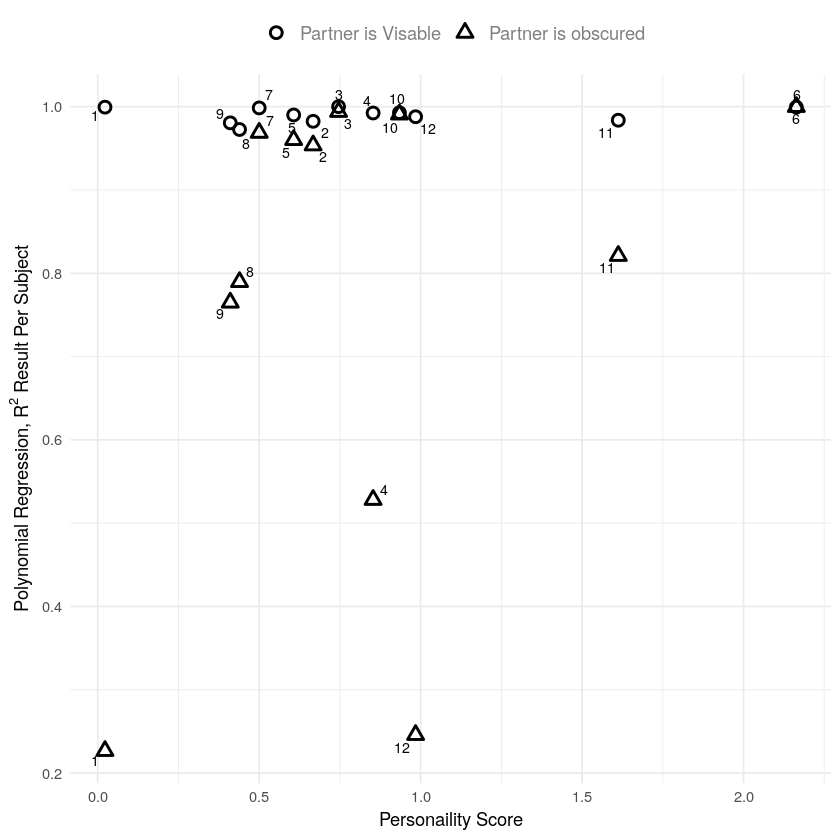

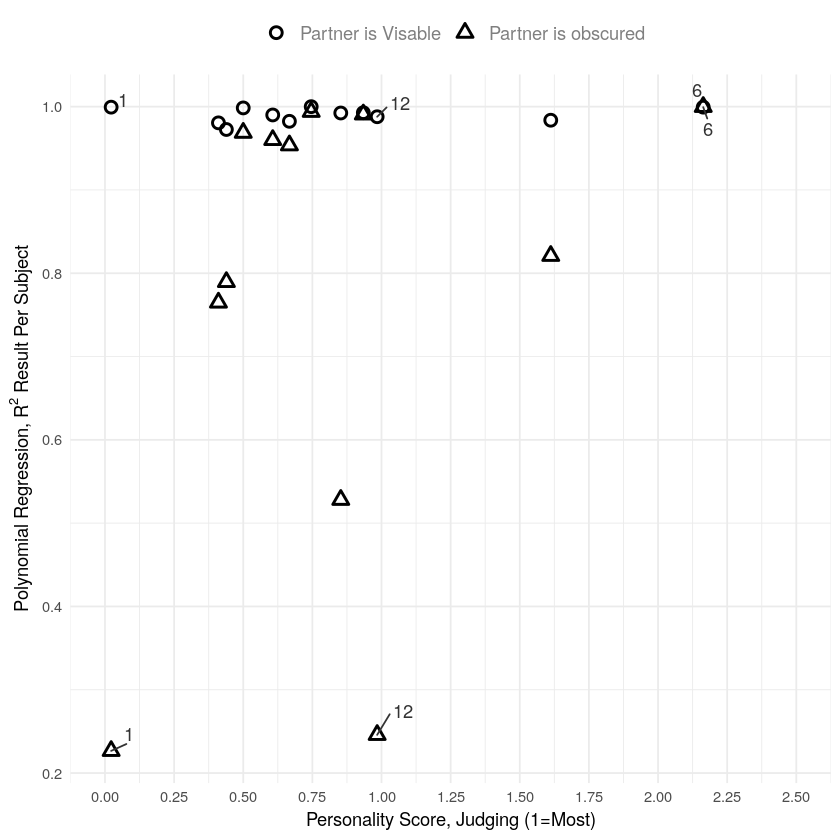

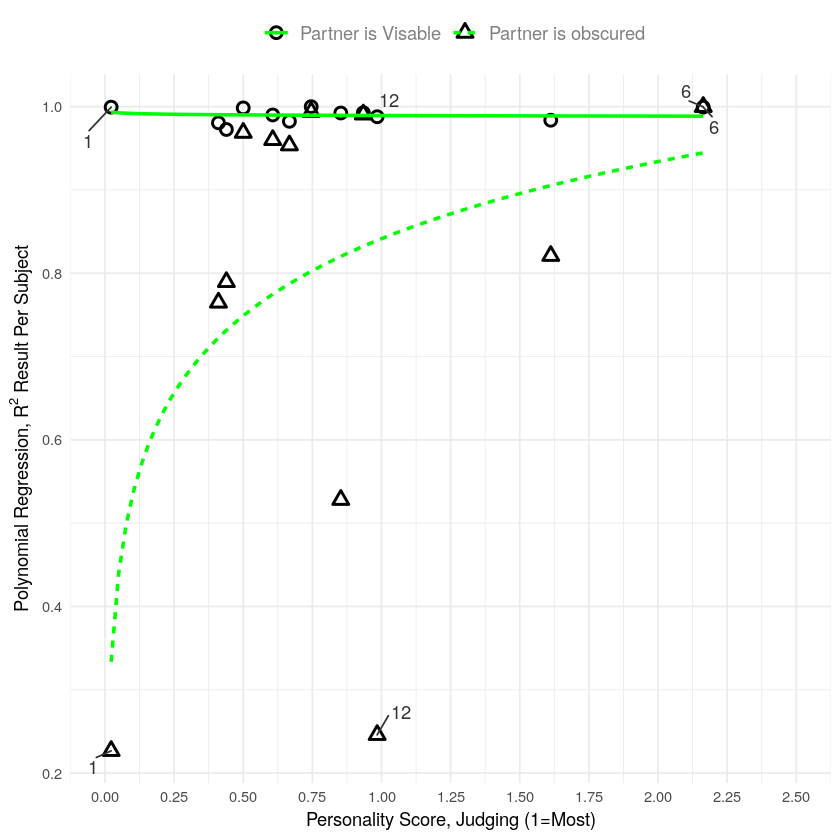

In [80]:
library("ggrepel")
Scatter.plot3<-Scatter.plot2+scale_shape_manual(values=c(21,24))

Scatter.plot3 + scale_shape_manual(values=c(21,24))+
  geom_text_repel(aes(label=Subject.F), size = 3)
pointsToLabel <- c("1","6","12")
Scatter.plot4<-Scatter.plot3 + scale_shape_manual(values=c(21,24))+
    geom_text_repel(aes(label = Subject.F),
                    color = "gray20",
                    data = subset(MergedData, Subject.F %in% pointsToLabel),
                    force = 10)
Scatter.plot5<- Scatter.plot4+scale_x_continuous(name = "Personality Score, Judging (1=Most)",
                       limits = c(0.0, 2.5),
                       breaks = seq(0.0, 2.5, by = 0.25)) 
Scatter.plot5
Scatter.plot6 <-Scatter.plot5 +  
  geom_smooth(aes(linetype = Vision.O, group=Vision.O),
              method = "lm",
              formula = y ~ log(x), se = FALSE,
              color = "green")
Scatter.plot6

In [78]:
install.packages("ggrepel")

Installing package into ‘/home/julian/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
